# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [9]:
# Extract all rows of data
all_data = soup.find_all('tr', class_= 'data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in all_data:
    cells = row.find_all('td')
    row_data = [cell.get_text(strip = True) for cell in cells]
    rows_list.append(row_data)

In [16]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
data_df = pd.DataFrame(rows_list, columns=column_names)

In [17]:
# Confirm DataFrame was created successfully
data_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [18]:
# Examine data type of each column
data_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [19]:
# Change data types for data analysis
data_df['terrestrial_date'] = pd.to_datetime(data_df['terrestrial_date'])
data_df['sol'] = data_df['sol'].astype(int)
data_df['ls'] = data_df['ls'].astype(int)
data_df['month'] = data_df['month'].astype(int)
data_df['min_temp'] = data_df['min_temp'].astype(float)
data_df['pressure'] = data_df['pressure'].astype(float)

In [20]:
# Confirm type changes were successful by examining data types again
data_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [74]:
# 1. How many months are there on Mars?
mars_months = data_df['month'].nunique()
print(f'There are {mars_months} months on Mars')

There are 12 months on Mars


In [77]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = data_df['sol'].nunique()
print(f'There are {martian_days} Martian days worth of data')

There are 1867 Martian days worth of data


In [29]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = data_df.groupby('month')['min_temp'].mean().reset_index()
print(avg_min_temp_by_month)

    month   min_temp
0       1 -77.160920
1       2 -79.932584
2       3 -83.307292
3       4 -82.747423
4       5 -79.308725
5       6 -75.299320
6       7 -72.281690
7       8 -68.382979
8       9 -69.171642
9      10 -71.982143
10     11 -71.985507
11     12 -74.451807


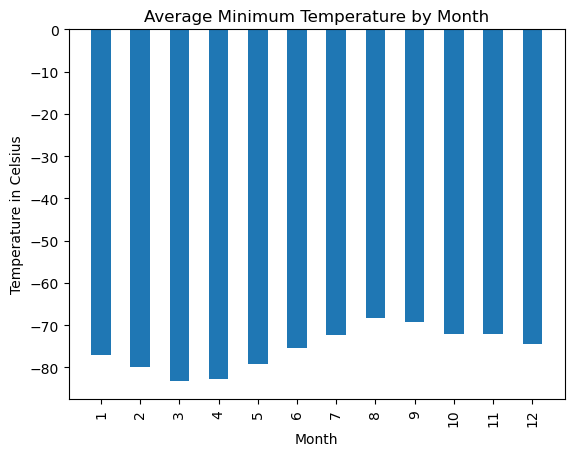

In [36]:
# Plot the average minimum temperature by month
plt.bar(avg_min_temp_by_month['month'], avg_min_temp_by_month['min_temp'], width=0.5)

#Formatting the chart
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(avg_min_temp_by_month['month'], rotation = 90)
plt.show()

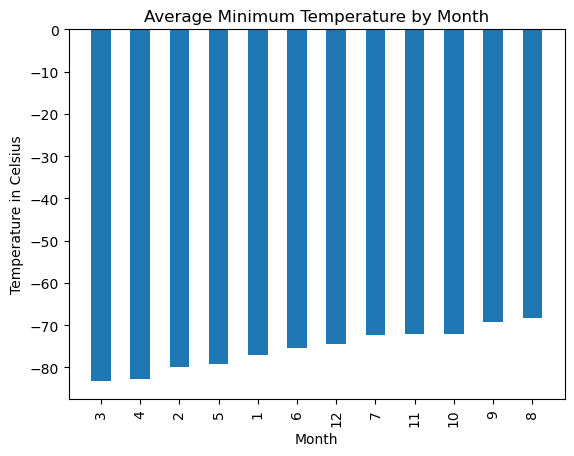

In [60]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_df = avg_min_temp_by_month_df.sort_values(by='min_temp').copy()
sorted_df['month_label'] = sorted_df['month'].astype(str)

# Create the bar chart
plt.bar(sorted_df['month_label'], sorted_df['min_temp'], width=0.5) 

# Formatting the chart
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(sorted_df['month_label'], rotation=90)
plt.show()

In [62]:
# 4. What is the average pressure by month?
avg_pressure_by_month = data_df.groupby('month')['pressure'].mean().reset_index()
print(avg_pressure_by_month)

    month    pressure
0       1  862.488506
1       2  889.455056
2       3  877.322917
3       4  806.329897
4       5  748.557047
5       6  745.054422
6       7  795.105634
7       8  873.829787
8       9  913.305970
9      10  887.312500
10     11  857.014493
11     12  842.156627


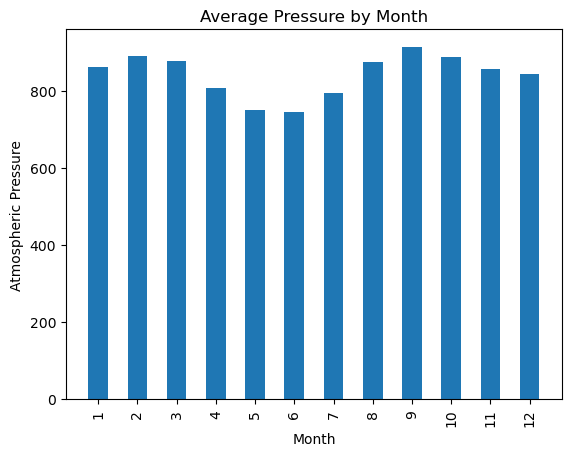

In [63]:
# Plot the average pressure by month
# Plot the average minimum temperature by month
plt.bar(avg_pressure_by_month['month'], avg_pressure_by_month['pressure'], width=0.5)

#Formatting the chart
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(avg_pressure_by_month['month'], rotation = 90)
plt.show()

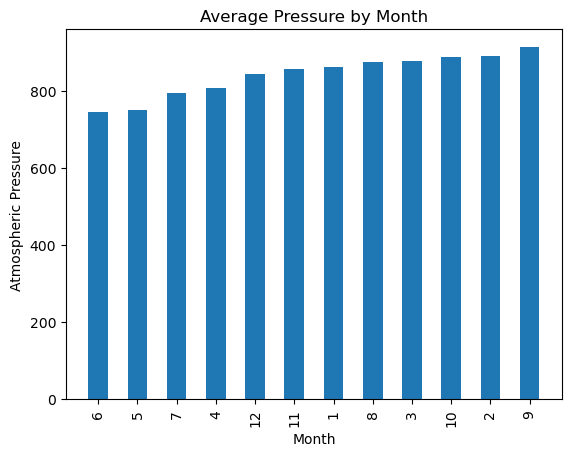

In [65]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure_df = avg_pressure_by_month.sort_values(by= 'pressure').copy()
sorted_pressure_df['month']= sorted_pressure_df['month'].astype(str)

#Create the chart
plt.bar(sorted_pressure_df['month'], sorted_pressure_df['pressure'], width=0.5)

#Formatting the chart
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(sorted_pressure_df['month'], rotation = 90)
plt.show()


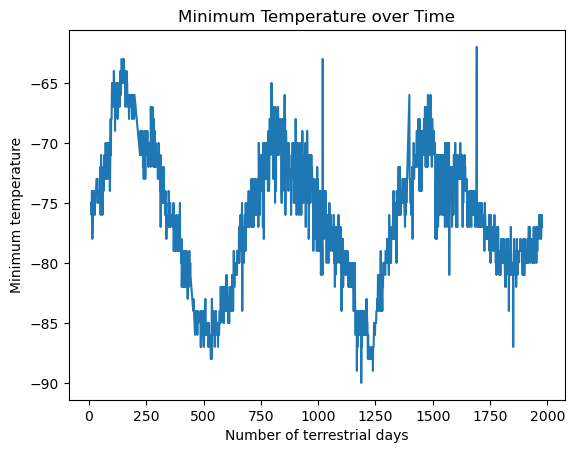

In [76]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(data_df['sol'], data_df['min_temp'])

plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

#### Minimum Temperature

The coldest month on Mars is March, and the top 4 coldest months are February, March, April, and May. This would point to Earth's Spring being the coldest season for Mars.

The warmest month on Mars is August, and the top 4 warmest months are August, September, October, and November. This would point to Earth's Fall being hte warmest season for Mars.

#### Atmospheric Pressure

The month with the lowest atmospheric pressure is June, and the top 4 lowest pressure months are April, May, June, and July. 

The month with the highest atmospheric pressure is September, and the top 4 highest pressure months are February, March, September, and October.

#### Year Length

Based on the Minimum Temperature over Time chart, temperatures on Mars cycle from their coldest, to their highest, then back down to their lowest in a time period of about 700 to 750 terrestrial days. This indicates that a Martian year is about 700 to 750 Earth Days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [78]:
# Write the data to a CSV
data_df.to_csv('mars_data.csv', index=False)

In [79]:
browser.quit()